# DIVE INTO CODE COURSE
## Introduction to Machine Learning Pre-class assignment 1 Classification of irises
### Doan Anh Tien - 1852789 - tien.doan.g0pr0@hcmut.edu.vn

### \[Problem 1] Select features and categories for practice

In [383]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
iris = load_iris()

Since we do not take setosa species into account, remove the first 50 rows is neccesary

In [384]:
x = pd.DataFrame(data=iris["data"][50:], columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
x = x.iloc[:, lambda x: [0,2]]
x

,sepal_length,petal_length
0,7.0,4.7
1,6.4,4.5
2,6.9,4.9
3,5.5,4.0
4,6.5,4.6
...,...,...
95,6.7,5.2
96,6.3,5.0
97,6.5,5.2
98,6.2,5.4


In [385]:
y = pd.DataFrame(data=iris["target"][50:], columns=['Species'])
y

,Species
0,1
1,1
2,1
3,1
4,1
...,...
95,2
96,2
97,2
98,2


The dataset after remove the "setosa" species and the width elements:

In [386]:
frames = [x, y]
df = pd.concat(frames, axis=1)
df

,sepal_length,petal_length,Species
0,7.0,4.7,1
1,6.4,4.5,1
2,6.9,4.9,1
3,5.5,4.0,1
4,6.5,4.6,1
...,...,...,...
95,6.7,5.2,2
96,6.3,5.0,2
97,6.5,5.2,2
98,6.2,5.4,2


### \[Problem 2] Data analysis

No handles with labels found to put in legend.


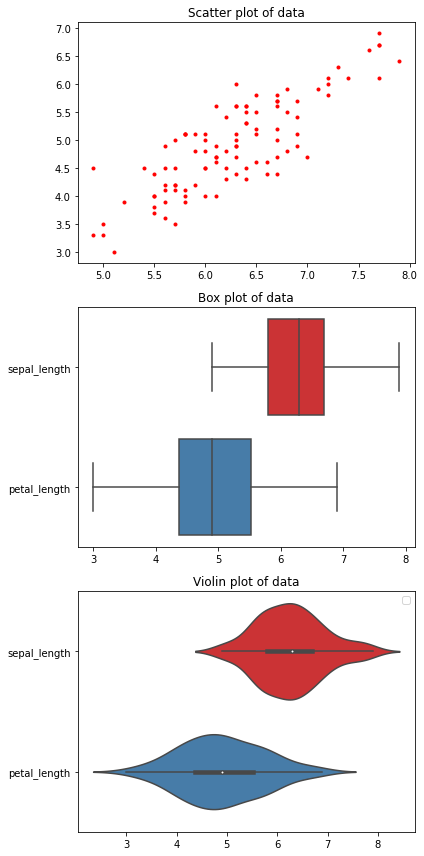

In [387]:
fig, axes = plt.subplots(3, 1, figsize=(6,12))

axes[0].scatter(x['sepal_length'], x['petal_length'], marker='.', color='red')
axes[0].set_title("Scatter plot of data")
sns.boxplot(ax=axes[1], data=x, orient="h", palette="Set1")
axes[1].set_title("Box plot of data")
sns.violinplot(ax=axes[2], data=x, orient="h", palette="Set1")
axes[2].set_title("Violin plot of data")

plt.legend()
plt.tight_layout()
plt.show()

### \[Problem 3] Division of preprocessing/training data and verification data

In [388]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
print("Train data: \n x = {} \n y = {} \n\n Test data: \n x = {} \n y = {} \n".format(x_train, x_test, y_train, y_test))

Train data: 
 x =     sepal_length  petal_length
15           6.7           4.4
40           5.5           4.4
96           6.3           5.0
9            5.2           3.9
72           7.7           6.7
..           ...           ...
60           6.5           5.1
71           5.6           4.9
14           5.6           3.6
92           5.8           5.1
51           5.8           5.1

[75 rows x 2 columns] 
 y =     sepal_length  petal_length
83           6.3           5.1
53           6.3           5.6
70           6.9           5.7
45           5.7           4.2
44           5.6           4.2
39           5.5           4.0
22           6.3           4.9
80           7.4           6.1
10           5.0           3.5
0            7.0           4.7
18           6.2           4.5
30           5.5           3.8
73           6.3           4.9
33           6.0           5.1
90           6.7           5.6
4            6.5           4.6
76           6.2           4.8
77           6.1       

### \[Problem 4] Pretreatment/Standardization

In [389]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

### \[Problem 5] Learning and estimation

I managed to write an accuracy calculator for myself.

In [390]:
def accuracy(predicted, true):
    count = 0
    n = len(predicted)
    for i in range(n):
        if (predicted[i] != true[i]):
            count+=1
    return 1-(count/n)

In [391]:
from sklearn.neighbors import KNeighborsClassifier

def Kneighbors(data, label, test, n):
    neigh = KNeighborsClassifier(n_neighbors=n)
    neigh.fit(data, label.values.ravel())
    predicted = neigh.predict(test)
    true = list(y_test['Species'])

    print("Predicted labels: {}".format(predicted))
    print("True labels: {}".format(true))
    print("Accuracy {}-nn: {:4f}".format(n, accuracy(predicted, true)))


In [392]:
Kneighbors(x_train_scaled, y_train, x_test_scaled, 20)

Predicted labels: [2 2 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 2 1 1 2 1 1 1 2]
True labels: [2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2]
Accuracy 20-nn: 0.840000


In [393]:
Kneighbors(x_train_scaled, y_train, x_test_scaled, 5)

Predicted labels: [2 2 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 2]
True labels: [2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2]
Accuracy 5-nn: 0.800000


In [394]:
Kneighbors(x_train_scaled, y_train, x_test_scaled, 3)

Predicted labels: [2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 2]
True labels: [2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2]
Accuracy 3-nn: 0.800000


### \[Problem 6] Evaluation
In this problem, we will calculate such metrics like Accuracy, Precision, Recall and F-measure by using function of scikit-learn.

In [395]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [396]:
neigh = KNeighborsClassifier(n_neighbors=20)
neigh.fit(x_train_scaled, y_train.values.ravel())
predicted = neigh.predict(x_test_scaled)

In [397]:
accuracy_score(y_test, predicted)

0.84

In [398]:
precision_score(y_test, predicted, average='macro')

0.8506944444444444

In [399]:
recall_score(y_test, predicted, average='macro')

0.827922077922078

In [400]:
f1_score(y_test, predicted, average='macro')

0.8333333333333333

In [401]:
confusion_matrix(y_test, predicted)

array([[13,  1],
       [ 3,  8]], dtype=int64)

By definition a confusion matrix $C$ is such that $C_{ij}$ is equal to the number of observations known to be in group i and predicted to be in group j

Our problem is considering the binary classification, so the matrix will has the shape (2,2) and in which each cell will followed the rule: row display the true label, and column display the label that predicted.

Cell (0,0) will show the value predict as class 0, and since it is in the first row which has the true label 0, this value is seen as the number of correct predictions.

In the same fashion, cell (0,1) is in the row which has the true label 0, but because it is in the column 1 (which mean it is predict as class 1), thus, this value show the number of wrong predictions.

And the same thing goes for cell (1,0) and (1,1)

### Therefore, from the confusion matrix of our code, the first row show 13, that means the model predicted 13 correct label and wrong in 1 label of class 1. In the second row, the model predicted 8 correct label and wrong in 3 label of class 2

### \[Problem 7] Visualization

In [402]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import numpy as np
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    Draw the determination area of the model that learned binary classification with two-dimensional features.
    The background color is drawn from the estimated values of the trained model.
    The points on the scatter plot are training or validation data.
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculate the estimate
    title : str
        Give the text of the graph Title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names= : list of str
        Give a list of legends
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

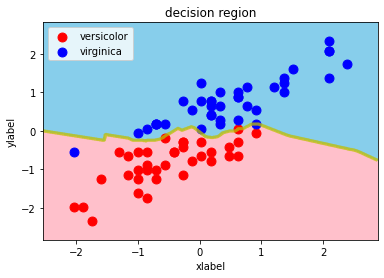

In [403]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train_scaled, y_train.values.ravel())
decision_region(x_train_scaled, y_train.values.ravel(), neigh)

### \[Problem 8] Learning by other methods
We will start to test each methods by using validation data.

### KNeighborClassifer

In [404]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.svm import SVC

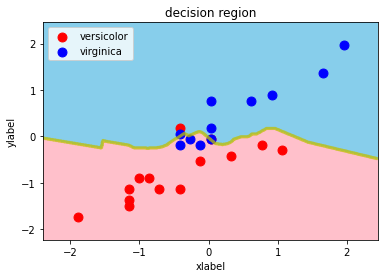

In [405]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train_scaled, y_train.values.ravel())
neigh_predicted = neigh.predict(x_test_scaled)
decision_region(x_test_scaled, y_test.values.ravel(), neigh)

In [406]:
print("Accuracy of standardized Kneighbor: {}".format(accuracy_score(y_test, neigh_predicted)))

Accuracy of standardized Kneighbor: 0.8


### LogisticRegression

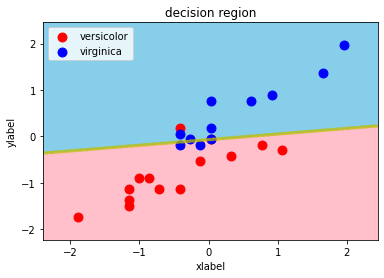

In [407]:
logistics = LogisticRegression(random_state=0).fit(x_train_scaled, y_train.values.ravel())
logistics_predicted = logistics.predict(x_test_scaled)
decision_region(x_test_scaled, y_test.values.ravel(), logistics)

In [408]:
print("Accuracy of standardized Logistics Regression: {}".format(accuracy_score(y_test, logistics_predicted)))

Accuracy of standardized Logistics Regression: 0.84


### SVC

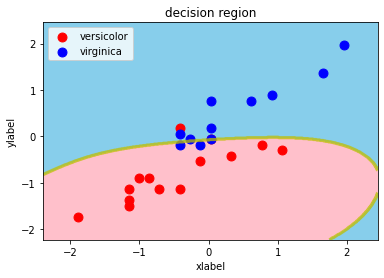

In [409]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svc_model = clf.fit(x_train_scaled, y_train.values.ravel())
svc_predicted = svc_model.predict(x_test_scaled)
decision_region(x_test_scaled, y_test.values.ravel(), svc_model)

In [410]:
print("Accuracy of standardized SVC: {}".format(accuracy_score(y_test, svc_predicted)))

Accuracy of standardized SVC: 0.84


### Decision Tree

In [411]:
clf = DecisionTreeClassifier(random_state=0)
decision_tree_predict = cross_val_score(clf, x_train_scaled, y_train.values.ravel(), cv=10)
decision_tree_predict

array([0.875     , 1.        , 0.875     , 0.75      , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.85714286])

### Random Forest

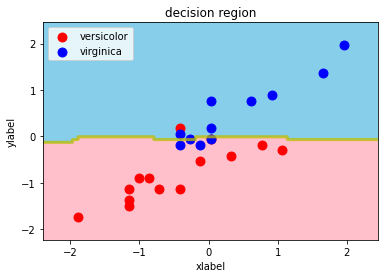

In [412]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
random_forest_model = clf.fit(x_train_scaled, y_train.values.ravel())
random_forest_predicted = random_forest_model.predict(x_test_scaled)
decision_region(x_test_scaled, y_test.values.ravel(), random_forest_model)

In [413]:
print("Accuracy of standardized Random Forest: {}".format(accuracy_score(y_test, random_forest_predicted)))

Accuracy of standardized Random Forest: 0.8


In [414]:
name = ["Kneighbor", "LogisticsRegression", "SVC", "RandomForest"]
predicts = [neigh_predicted, logistics_predicted, svc_predicted, random_forest_predicted]

for i in range(len(name)):
    y_test.insert(i+1, name[i], predicts[i])

y_test

,Species,Kneighbor,LogisticsRegression,SVC,RandomForest
83,2,2,2,2,2
53,2,2,2,2,2
70,2,2,2,2,2
45,1,1,1,1,1
44,1,1,1,1,1
39,1,1,1,1,1
22,1,2,2,2,1
80,2,2,2,2,2
10,1,1,1,1,1
0,1,1,1,1,1


### \[Problem 9] (Advanced task) Comparison with and without standardization

In [415]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
print("Train data: \n x = {} \n y = {} \n\n Test data: \n x = {} \n y = {} \n".format(x_train, x_test, y_train, y_test))

Train data: 
 x =     sepal_length  petal_length
15           6.7           4.4
40           5.5           4.4
96           6.3           5.0
9            5.2           3.9
72           7.7           6.7
..           ...           ...
60           6.5           5.1
71           5.6           4.9
14           5.6           3.6
92           5.8           5.1
51           5.8           5.1

[75 rows x 2 columns] 
 y =     sepal_length  petal_length
83           6.3           5.1
53           6.3           5.6
70           6.9           5.7
45           5.7           4.2
44           5.6           4.2
39           5.5           4.0
22           6.3           4.9
80           7.4           6.1
10           5.0           3.5
0            7.0           4.7
18           6.2           4.5
30           5.5           3.8
73           6.3           4.9
33           6.0           5.1
90           6.7           5.6
4            6.5           4.6
76           6.2           4.8
77           6.1       

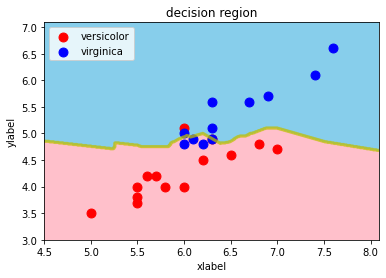

In [416]:
new_neigh = KNeighborsClassifier(n_neighbors=3)
new_neigh.fit(x_train.values, y_train.values.ravel())
new_neigh_predicted = new_neigh.predict(x_test.values)
decision_region(x_test.values, y_test.values.ravel(), new_neigh)

In [417]:
print("Accuracy of non-standardized Kneighbor: {}".format(accuracy_score(y_test, new_neigh_predicted)))

Accuracy of non-standardized Kneighbor: 0.8


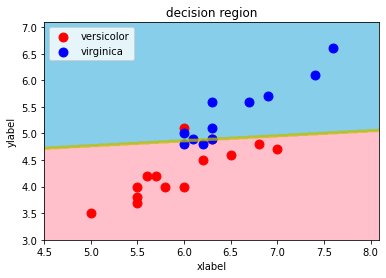

In [418]:
new_logistics = LogisticRegression(random_state=0).fit(x_train.values, y_train.values.ravel())
new_logistics_predicted = new_logistics.predict(x_test.values)
decision_region(x_test.values, y_test.values.ravel(), new_logistics)

In [419]:
print("Accuracy of non-standardized Logistics Regression: {}".format(accuracy_score(y_test, new_logistics_predicted)))

Accuracy of non-standardized Logistics Regression: 0.84


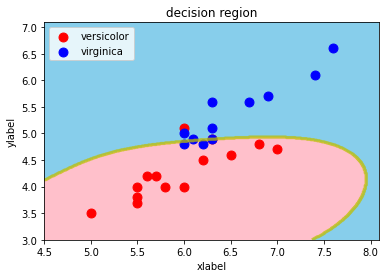

In [420]:
new_clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
new_svc_model = new_clf.fit(x_train.values, y_train.values.ravel())
new_svc_predicted = new_svc_model.predict(x_test.values)
decision_region(x_test.values, y_test.values.ravel(), new_svc_model)

In [421]:
print("Accuracy of non-standardized SVC {}".format(accuracy_score(y_test, new_svc_predicted)))

Accuracy of non-standardized SVC 0.84


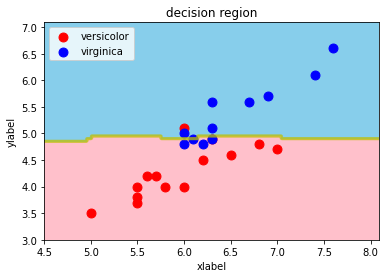

In [422]:
new_clf = RandomForestClassifier(max_depth=2, random_state=0)
new_random_forest_model = new_clf.fit(x_train.values, y_train.values.ravel())
new_random_forest_predicted = new_random_forest_model.predict(x_test.values)
decision_region(x_test.values, y_test.values.ravel(), new_random_forest_model)

In [423]:
print("Accuracy of non-standardized Random Forest: {}".format(accuracy_score(y_test, new_random_forest_predicted)))

Accuracy of non-standardized Random Forest: 0.8


In [424]:
new_name = ["Kneighbor", "LogisticsRegression", "SVC", "RandomForest"]
new_predicts = [new_neigh_predicted, new_logistics_predicted, new_svc_predicted, new_random_forest_predicted]

for i in range(len(new_name)):
    y_test.insert(i+1, new_name[i], new_predicts[i])

y_test

,Species,Kneighbor,LogisticsRegression,SVC,RandomForest
83,2,2,2,2,2
53,2,2,2,2,2
70,2,2,2,2,2
45,1,1,1,1,1
44,1,1,1,1,1
39,1,1,1,1,1
22,1,2,2,2,1
80,2,2,2,2,2
10,1,1,1,1,1
0,1,1,1,1,1


### SUMMARY
Here is what I found after rerun all methods without standardization:

* The decision area is quite larger compared to when we standardize the data (xlabel and ylabel are somehow range from 3-7 where as in standardization the range is reduced to smaller number)

### STANDARDIZATION
Data standardization is about making sure that data is internally consistent; that is, each data type has the same content and format. Standardization will rescale the data into a Gauss distribution with mean = 0, and variance = 1. It would help to improve the performance and accuracy for some algorithms, e.g: Logistic Regression.

### \[Problem 10] Multi-classes

In [425]:
x = pd.DataFrame(data=iris["data"], columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
x = x.iloc[:, lambda x: [0,2]]
x

,sepal_length,petal_length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
...,...,...
145,6.7,5.2
146,6.3,5.0
147,6.5,5.2
148,6.2,5.4


In [426]:
y = pd.DataFrame(data=iris["target"], columns=['Species'])
y

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [427]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
print("Train data: \n x = {} \n y = {} \n\n Test data: \n x = {} \n y = {} \n".format(x_train, x_test, y_train, y_test))

Train data: 
 x =      sepal_length  petal_length
4             5.0           1.4
32            5.2           1.5
142           5.8           5.1
85            6.0           4.5
86            6.7           4.7
..            ...           ...
71            6.1           4.0
106           4.9           4.5
14            5.8           1.2
92            5.8           4.0
102           7.1           5.9

[112 rows x 2 columns] 
 y =      sepal_length  petal_length
73            6.1           4.7
18            5.7           1.7
118           7.7           6.9
78            6.0           4.5
76            6.8           4.8
31            5.4           1.5
64            5.6           3.6
141           6.9           5.1
68            6.2           4.5
82            5.8           3.9
110           6.5           5.1
12            4.8           1.4
36            5.5           1.3
9             4.9           1.5
19            5.1           1.5
56            6.3           4.7
104           6.5       

In [428]:
scaler = StandardScaler()

scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

### KNeighbor

In [429]:
from mlxtend.plotting import plot_decision_regions

<AxesSubplot:>

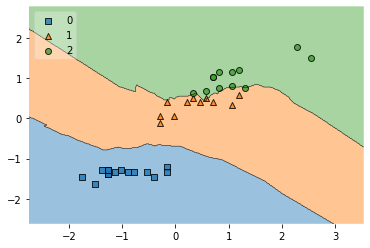

In [430]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train_scaled, y_train.values.ravel())
neigh_predicted = neigh.predict(x_test_scaled)
plot_decision_regions(x_test_scaled, y_test.values.ravel(), clf=neigh, legend=2)

In [431]:
print("Accuracy of standardized KNeighbor: {}".format(accuracy_score(y_test, neigh_predicted)))

Accuracy of standardized KNeighbor: 0.9473684210526315


<AxesSubplot:>

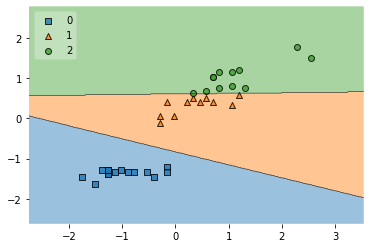

In [432]:
new_logistics = LogisticRegression(random_state=0).fit(x_train_scaled, y_train.values.ravel())
new_logistics_predicted = new_logistics.predict(x_test_scaled)
plot_decision_regions(x_test_scaled, y_test.values.ravel(), clf=new_logistics, legend=2)

In [433]:
print("Accuracy of standardized Logistic Regression: {}".format(accuracy_score(y_test, new_logistics_predicted)))

Accuracy of standardized Logistic Regression: 1.0


<AxesSubplot:>

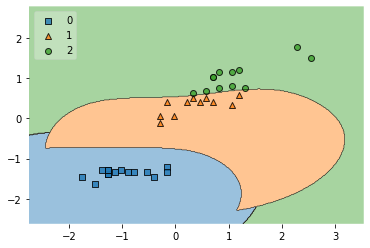

In [434]:
new_clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
new_svc_model = new_clf.fit(x_train_scaled, y_train.values.ravel())
new_svc_predicted = new_svc_model.predict(x_test_scaled)
plot_decision_regions(x_test_scaled, y_test.values.ravel(), clf=new_svc_model, legend=2)

In [435]:
print("Accuracy of standardized SVC: {}".format(accuracy_score(y_test, new_svc_predicted)))

Accuracy of standardized Logistic Regression: 1.0


<AxesSubplot:>

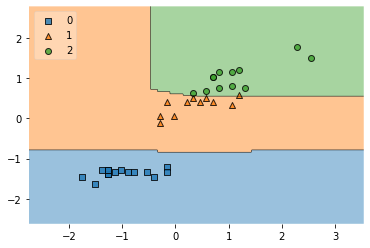

In [438]:
new_clf = RandomForestClassifier(max_depth=2, random_state=0)
new_random_forest_model = new_clf.fit(x_train_scaled, y_train.values.ravel())
new_random_forest_predicted = new_random_forest_model.predict(x_test_scaled)
plot_decision_regions(x_test_scaled, y_test.values.ravel(), clf=new_random_forest_model, legend=2)

In [439]:
print("Accuracy of standardized Random Forest: {}".format(accuracy_score(y_test, new_random_forest_predicted)))

Accuracy of standardized Random Forest: 0.9736842105263158
